In [1]:
import re
from enum import Enum
import matplotlib.pyplot as plt

# Part 1: bandwidth

In [2]:
results_dict = {  "std_one_node_shared_memory": _,
                  "std_one_node_no_shared_memory": _, 
                  "async_one_node_shared_memory": _,  
                  "async_one_node_no_shared_memory": _, 
                  "std_two_nodes_good_network": _, 
                  "async_two_nodes_good_network": _, 
                  "std_two_nodes_bad_network": _, 
                  "async_two_nodes_bad_network": _ }

In [3]:
class ParserState(Enum):
    READ_BUFFER = 1
    SKIP_LINE = 2
    READ_SENDER = 3
    READ_RECEIVER = 4

In [4]:
def get_results_from_file(name):
    with open("logs/" + name + ".log", "r") as f:
        PARSER_STATE = ParserState.READ_BUFFER
        results = {}
        buffer_size = _
        sender_time = _
        receiver_time = _
        for line in f:
            if PARSER_STATE == ParserState.READ_BUFFER:
                buffer_size = re.findall(r'\d+', line)[0]
                PARSER_STATE = ParserState.SKIP_LINE
                continue
            elif PARSER_STATE == ParserState.SKIP_LINE:
                PARSER_STATE = ParserState.READ_SENDER
                continue
            elif PARSER_STATE == ParserState.READ_SENDER:
                sender_time = re.findall(r'\d+\.\d+', line)[0]
                PARSER_STATE = ParserState.READ_RECEIVER
                continue
            elif PARSER_STATE == ParserState.READ_RECEIVER:
                receiver_time = re.findall(r'\d+\.\d+', line)[0]
                mean_time_for_one_message = (float(sender_time) + float(receiver_time)) / 2000
                message_size_in_bits = 8 * float(buffer_size)
                bandwidth = int(message_size_in_bits / mean_time_for_one_message)
                results.update({buffer_size: bandwidth})
                PARSER_STATE = ParserState.READ_BUFFER
                continue
        return results

In [5]:
for name in results_dict:
    results_dict[name] = get_results_from_file(name)

In [6]:
def get_plot_axis_for_communication_type(name):
    buffer_size_axis = [item * 2000 for item in range(1, 1001)]
    bandwidth_axis = []
    for buffer_size in buffer_size_axis:
        bandwidth_axis.append(results_dict[name][str(buffer_size)])
    fig = plt.gcf()
    fig.set_size_inches(16,8)
    plt.ylabel("Bandwidth (bps)")
    plt.xlabel("Message size (Bytes)")
    plt.plot(buffer_size_axis, bandwidth_axis, label=name)
    plt.legend()

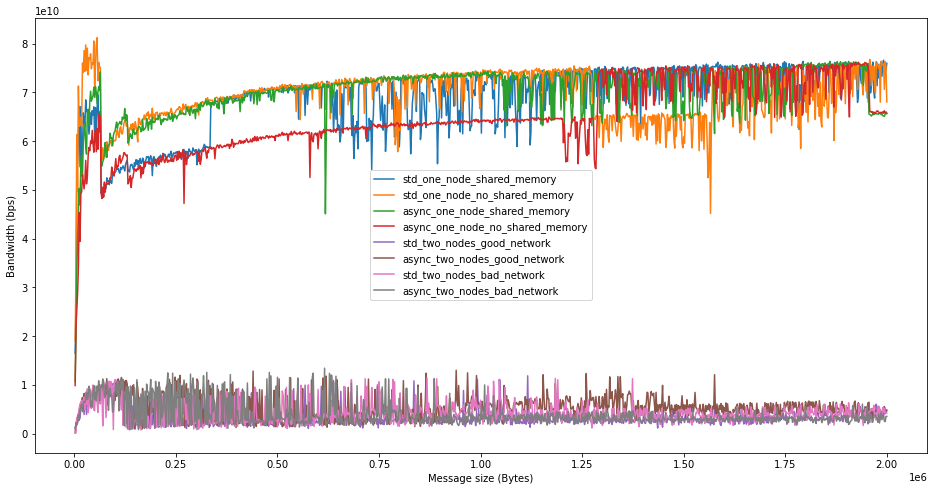

In [7]:
for name in results_dict:
    get_plot_axis_for_communication_type(name)

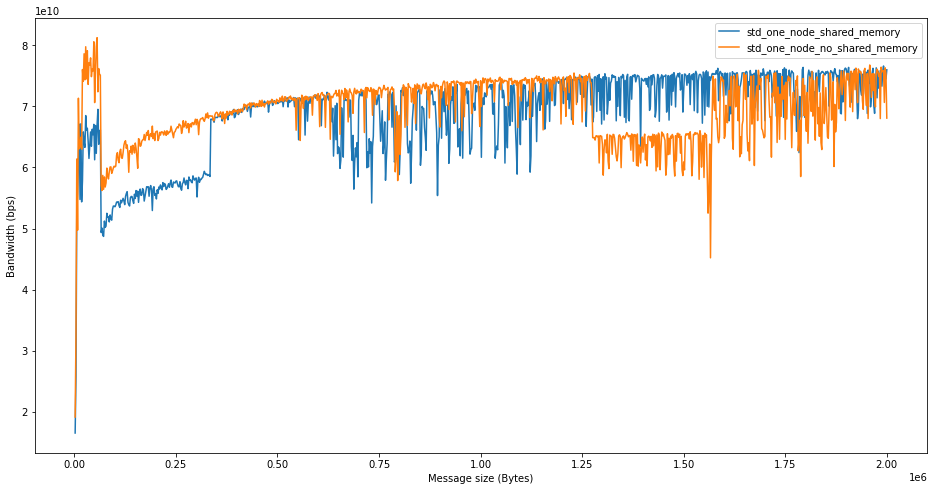

In [10]:
for name in ["std_one_node_shared_memory",
             "std_one_node_no_shared_memory"]:
    get_plot_axis_for_communication_type(name)

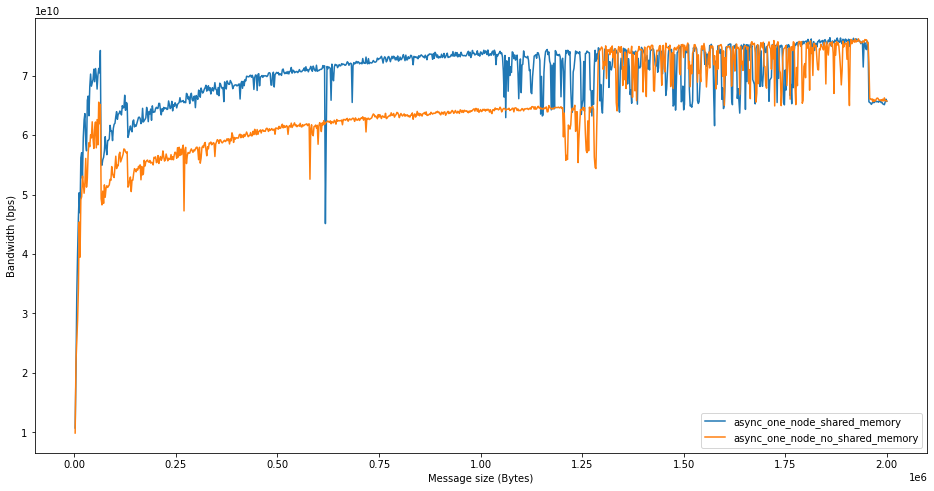

In [11]:
for name in ["async_one_node_shared_memory",
             "async_one_node_no_shared_memory"]:
    get_plot_axis_for_communication_type(name)

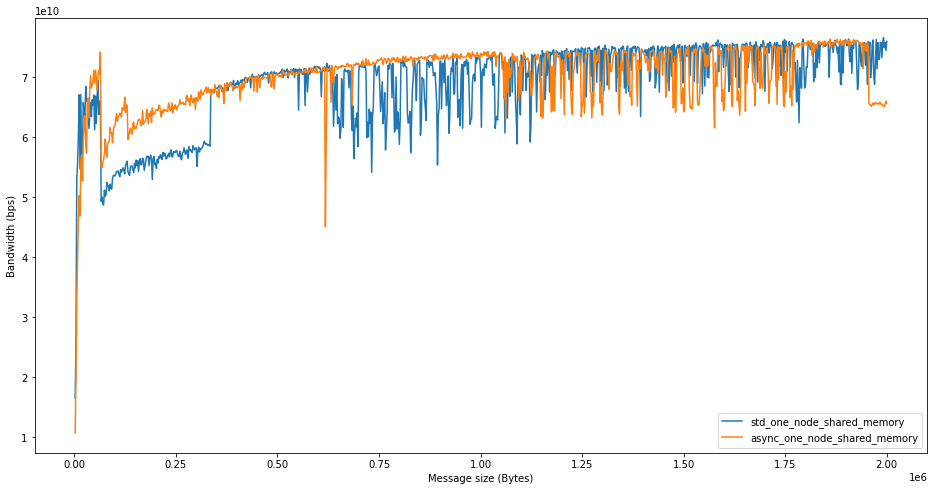

In [12]:
for name in ["std_one_node_shared_memory",
             "async_one_node_shared_memory"]:
    get_plot_axis_for_communication_type(name)

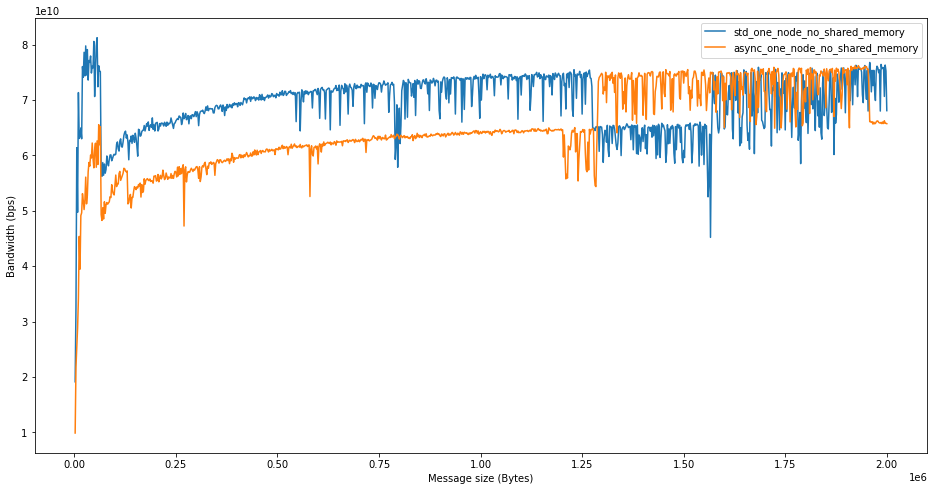

In [13]:
for name in ["std_one_node_no_shared_memory",
             "async_one_node_no_shared_memory"]:
    get_plot_axis_for_communication_type(name)

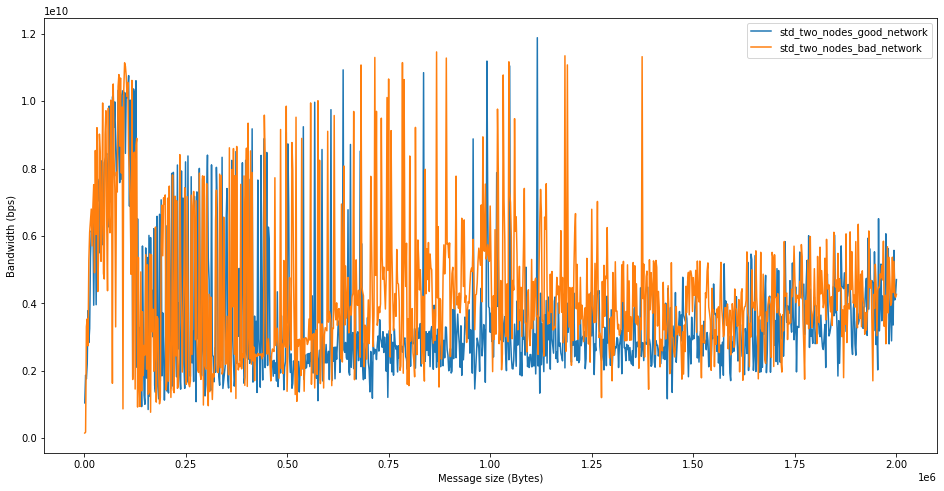

In [14]:
for name in ["std_two_nodes_good_network",
             "std_two_nodes_bad_network"]:
    get_plot_axis_for_communication_type(name)

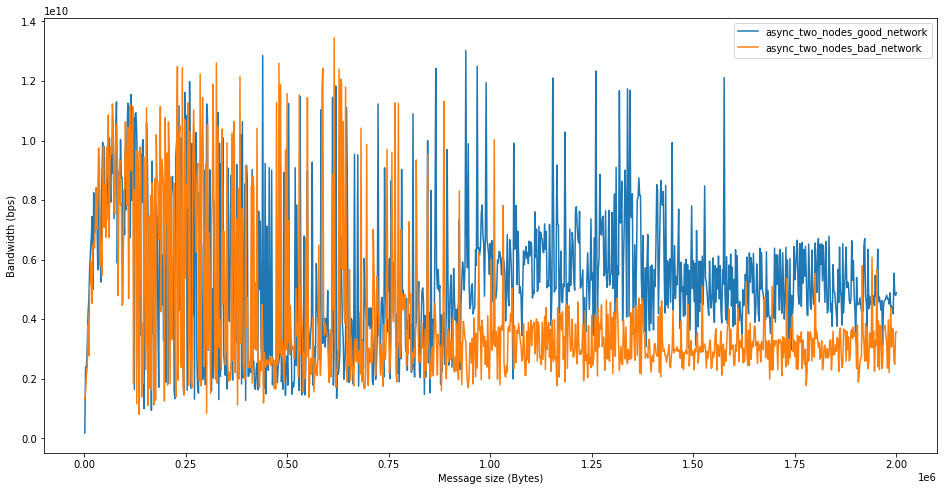

In [15]:
for name in ["async_two_nodes_good_network",
             "async_two_nodes_bad_network"]:
    get_plot_axis_for_communication_type(name)

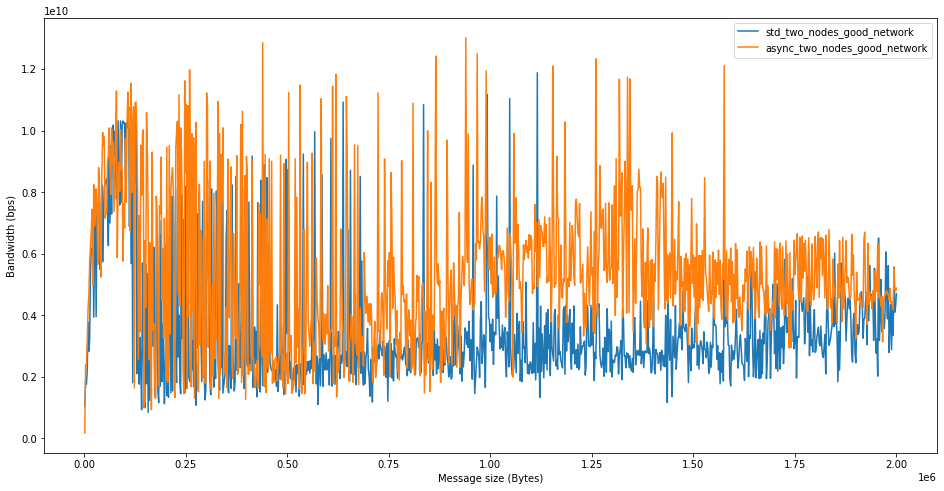

In [16]:
for name in ["std_two_nodes_good_network",
             "async_two_nodes_good_network"]:
    get_plot_axis_for_communication_type(name)

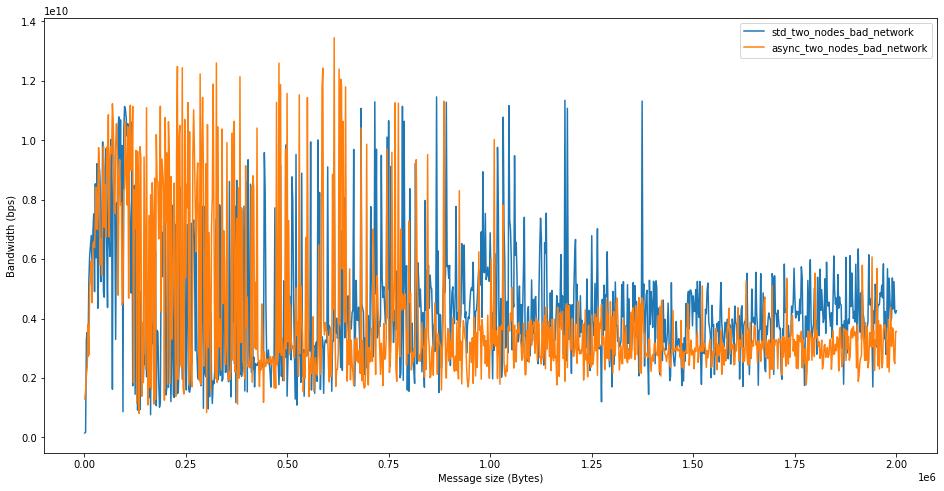

In [17]:
for name in ["std_two_nodes_bad_network",
             "async_two_nodes_bad_network"]:
    get_plot_axis_for_communication_type(name)

# Part 2: Delay

In [31]:
one_byte_msg = {  "std_one_node_shared_memory_small_message": _, 
                  "std_one_node_no_shared_memory_small_message": _, 
                  "async_one_node_shared_memory_small_message": _, 
                  "async_one_node_no_shared_memory_small_message": _, 
                  "std_two_nodes_good_network_small_message": _, 
                  "std_two_nodes_bad_network_small_message": _, 
                  "async_two_nodes_good_network_small_message": _, 
                  "async_two_nodes_bad_network_small_message": _ }

In [32]:
def get_delay_from_file(name):
    with open("logs/" + name + ".log", "r") as f:
        PARSER_STATE = ParserState.READ_BUFFER
        results = {}
        buffer_size = _
        sender_time = _
        receiver_time = _
        for line in f:
            if PARSER_STATE == ParserState.READ_BUFFER:
                buffer_size = re.findall(r'\d+', line)[0]
                PARSER_STATE = ParserState.SKIP_LINE
                continue
            elif PARSER_STATE == ParserState.SKIP_LINE:
                PARSER_STATE = ParserState.READ_SENDER
                continue
            elif PARSER_STATE == ParserState.READ_SENDER:
                sender_time = re.findall(r'\d+\.\d+', line)[0]
                PARSER_STATE = ParserState.READ_RECEIVER
                continue
            elif PARSER_STATE == ParserState.READ_RECEIVER:
                receiver_time = re.findall(r'\d+\.\d+', line)[0]
                mean_time_for_one_message = (float(sender_time) + float(receiver_time)) / 2000
                mean_time_in_seconds = 1000.0 * float(mean_time_for_one_message)
                results.update({buffer_size: mean_time_in_seconds})
                PARSER_STATE = ParserState.READ_BUFFER
                continue
        return results

In [33]:
for name in one_byte_msg:
    one_byte_msg[name] = get_delay_from_file(name)

In [34]:
for name in one_byte_msg:
    print(str(name) + ":\t" + str(one_byte_msg[name]['1']))

std_one_node_shared_memory_small_message:	0.1432515
std_one_node_no_shared_memory_small_message:	0.034784999999999996
async_one_node_shared_memory_small_message:	0.0023404999999999997
async_one_node_no_shared_memory_small_message:	0.0009935
std_two_nodes_good_network_small_message:	0.0245715
std_two_nodes_bad_network_small_message:	0.004208
async_two_nodes_good_network_small_message:	0.012067999999999999
async_two_nodes_bad_network_small_message:	0.0074505


# Report [PL]

Pomiary zostały zebrane 21 marca 2021r. <br>
Kod źródłowy: https://github.com/Mlokos/ParallelProgramming/tree/master/lab1/homework

## Przepustowość

**[Ogólne]**<br>
Komunikacja między node'ami na jednej stacji była o wiele szybsza niż przez sieć, tak dla komunikacji standardowej jak i asynchronicznej.<br>
W zależnośći od rozmiaru wiadomości komunikacja między node'ami na jednej stacji była od 5 do nawet 8 razy szybsza.<br>

**[Komunikacja na jednej stacji]**<br>
Wszystkie komunikaty na jednej stacji (tak dla funkcji standardowej jak i asynchronicznej, z wykorzystaniem pamięci wirtualnej lub nie) odznaczały się wysoką przepustowością dla wiadomości do długości 62,5kB.<br>
Dla komunikatów o długości większej niż 62,5kB można było zauważyć raptowny spadek przepustowości (ok. 25%), który zwiększał się stopniowo wraz ze zwiększającym się rozmiarem wiadomości.<br>
W przypadku komunikacji asynchronicznej dało się również zauważyć drugi próg przepustowości (dla wiadomości o długości od 62,5kB do 125kB), cechujący się rosnącą przepustowością dla rozmiaru znajdującego się w tym przedziale i kolejnym raptownym spadkiem na granicy 125kB.<br>

*Anomalie*<br>
Dla komunikacji standardowej przy pamięci współdzielonej można było zaobserwować spadek przepustowości dla wiadomości o rozmiarze w przedziale od 62,5kB do 350kB.<br>
Dla komunikacji standardowej bez pamięci współdzielonej można było zaobserwować spadek przepustowości dla wiadomości o rozmiarze w przedziale od 1,25MB do 1.6MB.<br>
Dla komunikacji asynchronicznej bez pamięci współdzielonej można było zaobserwować wzrost przepustowości dla wiadomości o rozmiarze większym niż 1,3MB.<br>
Dla komunikacji asynchronicznej można było zaobserwować spadek przepustowości dla wiadomości o rozmiarze większym niż 1.9MB.<br>

*Ocena użyteczności*<br>
Największą przepustowością odznaczała się komunikacja standardowa bez pamięci współdzielonej, poza rozmiarem wiadomości w przedziale od od 1,25MB do 1.6MB.<br>
Komunikacja standardowa odznaczała się małą wariancją w przepustowości dla wiadomości do rozmiaru 600kB.<br>
Komunikacja asynchroniczna odznaczała się małą wariancją w przepustowości dla wiadomości do rozmiaru 1MB. Dla komunikacji asynchronicznej bez pamięci współdzielonej stabilność była zachowana do rozmiaru 1,15MB<br>

**[Komunikacja przez sieć]**<br>
W przypadku komunikacji standardowej to czy node'y znajdują się na tym samym lub różnym hoście fizycznym nie miało większego znaczenia.<br>
Inaczej zachowała się komunikacja asynchroniczna, która dla node'ów znajdujących się na tym samym hoście fizycznym posiadała widocznie większą przepustowość niż dla node'ów znajdujących się na różnych hostach.<br>
Komunikacja asynchroniczna dla node'ów znajdujących się na tym samym hoście fizycznym była najlepszym rodzajem komunikacji.<br>

## Opóźnienie

**[Porównanie komunikacji synchronicznej ze względu na umiejscowienie node'ów]**<br>
Opóźnienie komunikacji bez pamięci współdzielonej było około 4 razy mniejsze niż z pamięcią współdzieloną.<br>
Opóźnienie komunikacji między node'ami znajdującymi się na tym samym hoście fizycznym było około 6 razy mniejsze niż dla node'ów znajdujących się na różnych hostach fizycznych.<br>

**[Porównanie między komunikacją standardową i asynchroniczną]**<br>
Dla każdego przypadku (poza komunikacją między node'ami znajdującymi się na różnych hostach fizycznych - co mogło wynikać z samej infrastruktury sieciowej) opóźnienia dla komunikacji asynchronicznej były mniejsze niż dla komunikacji standardowej.<br>
W przypadku jednego node'a i pamięci współdzielonej opóźnienie komunikacji asynchronicznej było około 60 razy mniejsze.<br>
W przypadku jednego node'a i pamięci współdzielonej opóźnienie komunikacji asynchronicznej było około 35 razy mniejsze.<br>
W przypadku dwóch node'ów na tym samym hoście fizycznym opóźnienie komunikacji asynchronicznej było około 2 razy mniejsze.<br>